# Projeto de Visão Computacional

## Tarefas de Classificação 

### Tarefa 1 - Divisão em treino, teste e validação

Para treinar um modelo é necessário dividir o dataset em treino, teste e validação, dessa forma, essa é a primeira tarefa a ser feita! 

Para isso, as seguintes bibliotecas foram utilizadas: 

In [1]:
import os
import numpy as np
import shutil 

E o código: 

In [2]:
# Assumindo valores dos parâmetros
root_dir = "Dataset"
classes = ["Darth Vader", "Stormtrooper", "Yoda"]
val_ratio = 0.15
test_ratio = 0.05

for i in classes: 
    # Cria pastas referentes a treino, teste e validação 
    os.makedirs("train/" + i)
    os.makedirs("test/" + i)
    os.makedirs("validation/" + i)

    # Lista as imagens de uma determinada classe e mistura
    source = root_dir + "/" + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    
    # Divisão em treino, validação e teste
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                             [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                              int(len(allFileNames)* (1 - test_ratio))])

    # Pegando o "path" de cada imagem listada
    train_FileNames = [source + "/" + name for name in train_FileNames.tolist()]
    val_FileNames = [source + "/" + name for name in val_FileNames.tolist()]
    test_FileNames = [source + "/" + name for name in test_FileNames.tolist()]

    # Copia as imagens originais para as pastas criadas
    for name in train_FileNames:
        shutil.copy(name, "train/" + i)

    for name in val_FileNames:
        shutil.copy(name, "validation/" + i)

    for name in test_FileNames:
        shutil.copy(name, "test/" + i)

    # Impressão do número de imagens que foram para cada pasta
    print(i)
    print("Total de imagens: ", len(allFileNames))
    print("Treino: ", len(train_FileNames))
    print("Validação: ", len(val_FileNames))
    print("Teste: ", len(test_FileNames))

Darth Vader
Total de imagens:  690
Treino:  552
Validação:  103
Teste:  35
Stormtrooper
Total de imagens:  649
Treino:  519
Validação:  97
Teste:  33
Yoda
Total de imagens:  488
Treino:  390
Validação:  73
Teste:  25


Com a impressão dos dados acima é possível perceber que as imagens foram divididas por classe, ou seja, pegando o número total de imagens de uma certa classe e dividindo seguindo a porcentagem que foi colocada para treino, teste e validação. 

### Tarefa 2 - Transformação das imagens em tensores

Essa tranformação é necessária para que o modelo consiga aprender, para isso, será utilizado o TensorFlow. 

In [3]:
from keras.preprocessing.image import ImageDataGenerator

É importante notar que a classe ImageDataGenerator possui 3 métodos para ler as imagens: flow(), flow_from_directory() e flow_from_dataframe(). Nesse notebook, será utilizado o segundo método: flow_from_directory. 

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

Utilizando o método para as imagens de treino: 

In [5]:
train_generator = train_datagen.flow_from_directory("train/", target_size = (150, 150), batch_size = 32, class_mode='categorical', shuffle = True)

Found 1461 images belonging to 3 classes.


Para as imagens de validação: 

In [6]:
validation_generator = validation_datagen.flow_from_directory("validation/", target_size = (150, 150), batch_size = 32, class_mode='categorical', shuffle = True)

Found 273 images belonging to 3 classes.


E finalmente, para as imagens de teste: 

In [7]:
test_generator = test_datagen.flow_from_directory("test/", target_size = (150, 150), batch_size = 1, class_mode = 'categorical', shuffle = True)

Found 93 images belonging to 3 classes.


### Tarefa 3 - Regressão Logística

Nesta tarefa será criado um modelo de classificação: regressão logística. 

Para isso, primeiramente, as imagens serão transformadas em um vetor 1xN: 

Será adicionada mais uma biblioteca para ser utilizada: 

In [8]:
import cv2

E os seguintes parâmetros serão definidos: 

In [9]:
width = 150
height = 150

Agora, os dados de treino serão transformados em vetores: 

In [10]:
x_train = []
y_train = []
train_vader = []
train_trooper = []
train_yoda = []

# Darth Vader
for img in os.listdir("train/Darth Vader"): 
    path = os.path.join("train/Darth Vader", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    train_vader.append(img) 
    y_train.append(0)

# Stormtrooper
for img in os.listdir("train/Stormtrooper"): 
    path = os.path.join("train/Stormtrooper", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    train_trooper.append(img) 
    y_train.append(1)

# Yoda
for img in os.listdir("train/Yoda"): 
    path = os.path.join("train/Yoda", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    train_yoda.append(img) 
    y_train.append(2)

x_train = np.concatenate((np.array(train_vader),np.array(train_trooper), np.array(train_yoda)), axis=0)
y_train = np.array(y_train)

Os dados de validação: 

In [11]:
x_val = []
y_val = []
val_vader = []
val_trooper = []
val_yoda = []

# Darth Vader
for img in os.listdir("validation/Darth Vader"): 
    path = os.path.join("validation/Darth Vader", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    val_vader.append(img) 
    y_val.append(0)

# Stormtrooper
for img in os.listdir("validation/Stormtrooper"): 
    path = os.path.join("validation/Stormtrooper", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    val_trooper.append(img) 
    y_val.append(1)

# Yoda
for img in os.listdir("validation/Yoda"): 
    path = os.path.join("validation/Yoda", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    val_yoda.append(img) 
    y_val.append(2)

x_val = np.concatenate((np.array(val_vader),np.array(val_trooper), np.array(val_yoda)), axis=0)
y_val = np.array(y_val)

E por último, os dados de teste: 

In [12]:
x_test = []
y_test = []
test_vader = []
test_trooper = []
test_yoda = []

# Darth Vader
for img in os.listdir("test/Darth Vader"): 
    path = os.path.join("test/Darth Vader", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    test_vader.append(img) 
    y_test.append(0)

# Stormtrooper
for img in os.listdir("test/Stormtrooper"): 
    path = os.path.join("test/Stormtrooper", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    test_trooper.append(img) 
    y_test.append(1)

# Yoda
for img in os.listdir("test/Yoda"): 
    path = os.path.join("test/Yoda", img)
    # Lê a imagem 
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Redimensiona 
    img = cv2.resize(img, (height, width))
    # Adiciona na lista
    test_yoda.append(img) 
    y_test.append(2)

x_test = np.concatenate((np.array(test_vader),np.array(test_trooper), np.array(test_yoda)), axis=0)
y_test = np.array(y_test)

Outra mudança a ser feita é alterar seu formato, de 3 dimensões para 2: 


In [13]:
x_train.shape

(1461, 150, 150)

In [14]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_train_flatten.shape

(1461, 22500)

In [15]:
x_val_flatten = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

Finalmente, após toda essa preparação, pode-se criar o modelo: 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
log_reg = LogisticRegression()
log_reg.fit(x_train_flatten, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Com a resposta ao código acima, percebeu-se que o modelo não convergiu, mas ainda assim, ele conseguiu uma certa acurácia, ainda que tenha errado mais do que acertado:

In [18]:
y_predicted_logreg = log_reg.predict(x_val_flatten)
print(f'Acurácia em validação: {accuracy_score(y_val, y_predicted_logreg)}')

y_predicted_logreg = log_reg.predict(x_test_flatten)
print(f'Acurácia em teste: {accuracy_score(y_test, y_predicted_logreg)}')

Acurácia em validação: 0.4908424908424908
Acurácia em teste: 0.5806451612903226


Dessa forma, como uma tentativa de fazer o modelo convergir, será feito uma "standardization", uma das formas de pré-processar os dados para que se tenha uma média zero e variância unitária, isto é, uma distribuição Gaussiana. 

In [19]:
from sklearn import preprocessing

In [20]:
scaler = preprocessing.StandardScaler().fit(x_train_flatten)

In [21]:
scaler.mean_

array([101.8973306 , 102.31964408, 103.25530459, ...,  99.51129363,
        99.28268309,  98.52156057])

In [22]:
x_train_scaled = scaler.transform(x_train_flatten)

In [23]:
x_train_scaled.mean(axis = 0)

array([-1.03499231e-16, -3.40437998e-17,  1.62619937e-17, ...,
       -7.29509996e-17, -1.65507580e-16,  1.44382187e-17])

Com o código acima, pode-se perceber a diferença da média antes do "standardization" e depois dele. 

Seguindo o que foi feito com os dados de treino para os de validação e teste: 

In [24]:
x_val_scaled = preprocessing.StandardScaler().fit(x_val_flatten).transform(x_val_flatten)
x_test_scaled = preprocessing.StandardScaler().fit(x_test_flatten).transform(x_test_flatten)

E finalmente, uma nova tentativa de criar o modelo: 

In [25]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_train_scaled, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Infelizmente o modelo não convergiu de novo, mas pode-se observar uma melhora na acurácia: 

In [26]:
y_predicted_logreg = log_reg2.predict(x_val_scaled)
print(f'Acurácia em validação: {accuracy_score(y_val, y_predicted_logreg)}')

y_predicted_logreg = log_reg2.predict(x_test_scaled)
print(f'Acurácia em teste: {accuracy_score(y_test, y_predicted_logreg)}')

Acurácia em validação: 0.5970695970695971
Acurácia em teste: 0.6451612903225806


Depois disso, tentou-se usar o GridSearchCV conforme os códigos abaixo para tentar encontrar os melhores hiperparâmetros para a regressão linear, mas devido a diversas tentativas falhas (sem convergência) desistiu-se da ideia. 

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression, grid, cv=10)
log_reg_cv.fit(x_train_scaled, y_train)

Em resumo, conseguiu-se obter os seguintes resultados: 

In [28]:
print("Primeiro teste sem o pré-processamento")
y_predicted_logreg = log_reg.predict(x_val_flatten)
print(f'Acurácia em validação: {accuracy_score(y_val, y_predicted_logreg)}')

y_predicted_logreg = log_reg.predict(x_test_flatten)
print(f'Acurácia em teste: {accuracy_score(y_test, y_predicted_logreg)}')

print("\nSegundo teste pós o pré-processamento")
y_predicted_logreg = log_reg2.predict(x_val_scaled)
print(f'Acurácia em validação: {accuracy_score(y_val, y_predicted_logreg)}')

y_predicted_logreg = log_reg2.predict(x_test_scaled)
print(f'Acurácia em teste: {accuracy_score(y_test, y_predicted_logreg)}')

Primeiro teste sem o pré-processamento
Acurácia em validação: 0.4908424908424908
Acurácia em teste: 0.5806451612903226

Segundo teste pós o pré-processamento
Acurácia em validação: 0.5970695970695971
Acurácia em teste: 0.6451612903225806


Dessa forma, pode-se concluir que ainda que o modelo não tenha convergido, alguns resultados foram obtidos, mas deixam a desejar, indicando que muito provavelmente existam outros modelos de classificação que se encaixem melhor no problema proposto. 

### Tarefa 4 - Rede Convolucional 

Para criar uma rede convolucional serão utilizadas as seguintes funcionalidades: 

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Com isso, pode-se criar o modelo! 

Será importante notar que o "input_shape", que deve ser fornecida no primeiro "layer", tem como entrada a altura e o comprimento da imagem além da quantidade de canais (RGB) , "activation" indica a função de ativação, que neste caso é a ReLU. 

Além disso, outras informações que podem ser observadas: 

- A saída de cada camada Conv2 e MaxPooling2D é um tensor, o número de canais é controlado como um parâmetro e as dimensões da imagem diminuem conforme o aprofundamento na rede. 

- O uso de Flatten serve para transformar um tensor 3D para um 1D. 

- O uso de Dense é para a criação de camadas densas para realizar a classificação e possui como entrada tensores 1D. 

- A última camada deverá possuir como parâmetro o número de classes (de saídas). 




In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3))

Com o código abaixo é possível verificar tais informações apresentadas acima ao observar a arquitetura do modelo:  

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

Finalmente, compilando e treinando o modelo: 

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    epochs=5)


C:\Users\user\AppData\Local\Temp\ipykernel_8028\656975245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
45/45 [==============================] - 57s 1s/step - loss: 1.4539 - accuracy: 0.4178 - val_loss: 0.9162 - val_accuracy: 0.5078
Epoch 2/5
45/45 [==============================] - 55s 1s/step - loss: 0.7753 - accuracy: 0.6375 - val_loss: 0.7781 - val_accuracy: 0.6406
Epoch 3/5
45/45 [==============================] - 56s 1s/step - loss: 0.5941 - accuracy: 0.7397 - val_loss: 0.7172 - val_accuracy: 0.7070
Epoch 4/5
45/45 [==============================] - 55s 1s/step - loss: 0.3815 - accuracy: 0.8628 - val_loss: 0.7552 - val_accuracy: 0.6953
Epoch 5/5
45/45 [==============================] - 55s 1s/step - loss: 0.2294 - accuracy: 0.9307 - val_loss: 0.7833 - val_accuracy: 0.7617


E com o código abaixo, pode-se observar um gráfico indicando como o modelo teve sua acurácia aumentada durante o treino: 

9/9 [==============================] - 3s 363ms/step - loss: 0.7764 - accuracy: 0.7546


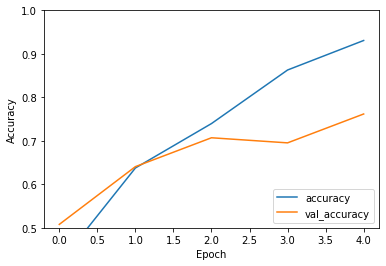

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator)

Finalmente, para testar o modelo com os dados de teste: 

In [34]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

93/93 [==============================] - 2s 22ms/step - loss: 0.5693 - accuracy: 0.7957
Test loss: 0.5693395733833313
Test accuracy: 0.7956989407539368


Com isso, pôde-se observar que houve um aumento na acurácia ao comparar com o modelo de regressão logística. 

### Tarefa 5 - Transfer Learning

Nesta tarefa será utilizado o "transfer learning", ou seja, será utilizado o aprendizado de transferência de uma rede já pré-treinada. Além disso, ao contrário do que foi feito anteriormente, será utilizado o "image_dataset_from_directory" ao invés do "flow_from_directory". 

Primeiramente, alguns parâmetros serão definidos: 

In [35]:
batch_size = 32
img_size = (160, 160)

Com isso, pode ser utilizado o método citado anteriormente para criar os datasets de treino, validação e teste: 

In [36]:
train_dataset = tf.keras.utils.image_dataset_from_directory("train/",
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            image_size=img_size)

Found 1461 files belonging to 3 classes.


In [37]:
validation_dataset = tf.keras.utils.image_dataset_from_directory("validation/",
                                                                shuffle=True,
                                                                batch_size=batch_size,
                                                                image_size=img_size)

Found 273 files belonging to 3 classes.


In [38]:
test_dataset = tf.keras.utils.image_dataset_from_directory("test/",
                                                            shuffle=True,
                                                            batch_size=batch_size,
                                                            image_size=img_size)

Found 93 files belonging to 3 classes.


Agora, visualizando algumas imagens... 

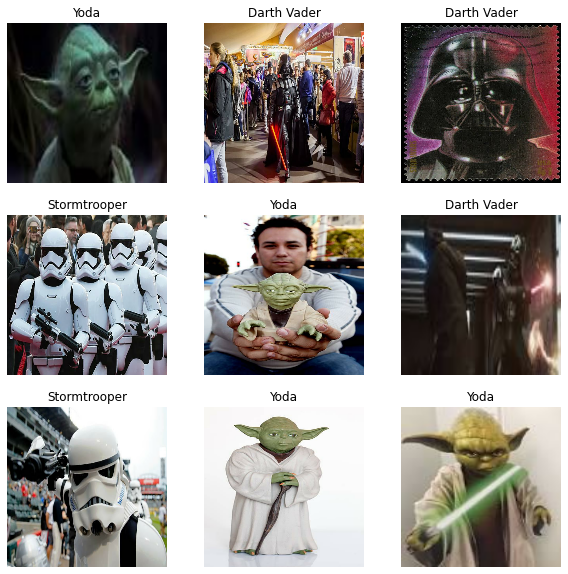

In [39]:
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Será feito também uma pré-busca em buffer para carregar imagens a fim de melhorar o desempenho. 

In [40]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [41]:
from tensorflow.keras import layers

Além disso, como o dataset não possui muitas imagens, a augmentação das imagens se torna um passo muito importante a fim de reduzir o overfitting: 

In [42]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Outra manipulação que deve ser feita é redimensionar os valores de pixel para o modelo base que será usado, uma vez que ele espera valores [-1, 1].

In [43]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Finalmente, é possível criar o modelo base: 

In [44]:
# Cria o modelo base a partir do MobileNet V2
img_shape = img_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

É importante ressaltar que o parâmetro "include_top" deve ser "False" para que a rede carregada não inclua as camadas de classificação na parte superior. 

In [45]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)

O próximo código irá congelar a base convolucional criada anteriormente e usará como extrator de recursos. Ao congelar, isso evita que os pesos em uma determinada camada seja atualizada durante o treinamento.

In [46]:
base_model.trainable = False

Agora será adicionado um cabeçalho de classificação para gerar previsões a partir do bloco de feições e converter esses recursos numa previsão: 

In [47]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

In [48]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)

Observação: Nesse caso, o valor 3 ao adicionar uma camada densa se refere a quantidade de classes. 

Finalmente, a criação do modelo será apresentada abaixo, utilizando os códigos criados anteriormente: 

In [49]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = rescale(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

E agora, a compilação do modelo: 

In [50]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0     

E o treinamento do modelo: 

In [52]:
initial_epochs = 10

In [53]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
46/46 [==============================] - 52s 1s/step - loss: 1.2661 - accuracy: 0.4209 - val_loss: 1.1352 - val_accuracy: 0.4872
Epoch 2/10
46/46 [==============================] - 41s 875ms/step - loss: 1.0123 - accuracy: 0.5441 - val_loss: 0.9448 - val_accuracy: 0.5678
Epoch 3/10
46/46 [==============================] - 42s 905ms/step - loss: 0.9004 - accuracy: 0.6099 - val_loss: 0.8192 - val_accuracy: 0.6484
Epoch 4/10
46/46 [==============================] - 42s 909ms/step - loss: 0.7544 - accuracy: 0.6735 - val_loss: 0.7394 - val_accuracy: 0.6777
Epoch 5/10
46/46 [==============================] - 47s 1s/step - loss: 0.6939 - accuracy: 0.7050 - val_loss: 0.6624 - val_accuracy: 0.7216
Epoch 6/10
46/46 [==============================] - 45s 976ms/step - loss: 0.6467 - accuracy: 0.7303 - val_loss: 0.6113 - val_accuracy: 0.7546
Epoch 7/10
46/46 [==============================] - 43s 932ms/step - loss: 0.5770 - accuracy: 0.7693 - val_loss: 0.5603 - val_accuracy: 0.7985
Epoch

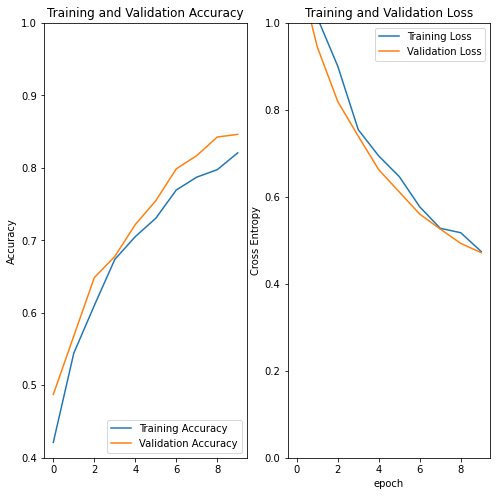

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [55]:
score = model.evaluate(test_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 2s 615ms/step - loss: 0.3266 - accuracy: 0.8817
Test loss: 0.32656130194664
Test accuracy: 0.8817204236984253


Com isso, pôde-se perceber que este modelo conseguiu uma acurácia maior que os outros modelos, além de uma perda menor!! 

Após todo esse trabalho, é possível fazer uma afinação e atualizar os pesos das camadas que foram congeladas junto ao treinamento de classificador que foi adicionado e aumentar ainda mais o desempenho do modelo! Para isso, será ajustado apenas um pequeno número de camadas superiores. 

Observação: na maioria dessa redes convolucionais, quanto mais alta, mais especializada é a camada.

Para começar, as camadas superiores serão descongeladas com o seguinte comando: 

In [56]:
base_model.trainable = True

E agora, define-se as camadas inferiores como não-treináveis: 

In [57]:
print("Número de camadas do modelo: ", len(base_model.layers))

# O ajuste fino será feito a partir dessa camada
fine_tune_at = 100

# Congelamento de todas as camadas antes da camada definida anteriormente 
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Número de camadas do modelo:  154


Compilando o modelo: 

Observação: Nesse caso, a taxa de aprendizado será menor, pois o modelo terá mais pesos para atualizar. 

In [58]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0     

Treinando o modelo novamente: 

In [60]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
46/46 [==============================] - 73s 1s/step - loss: 0.4330 - accuracy: 0.8316 - val_loss: 0.3584 - val_accuracy: 0.8755
Epoch 11/20
46/46 [==============================] - 69s 1s/step - loss: 0.3220 - accuracy: 0.8809 - val_loss: 0.3272 - val_accuracy: 0.8864
Epoch 12/20
46/46 [==============================] - 77s 2s/step - loss: 0.2985 - accuracy: 0.8795 - val_loss: 0.3041 - val_accuracy: 0.8901
Epoch 13/20
46/46 [==============================] - 69s 1s/step - loss: 0.2530 - accuracy: 0.8994 - val_loss: 0.3031 - val_accuracy: 0.9011
Epoch 14/20
46/46 [==============================] - 71s 2s/step - loss: 0.2453 - accuracy: 0.9035 - val_loss: 0.2971 - val_accuracy: 0.9011
Epoch 15/20
46/46 [==============================] - 67s 1s/step - loss: 0.2366 - accuracy: 0.9110 - val_loss: 0.2855 - val_accuracy: 0.9011
Epoch 16/20
46/46 [==============================] - 68s 1s/step - loss: 0.2026 - accuracy: 0.9206 - val_loss: 0.2863 - val_accuracy: 0.9048
Epoch 17/20
4

In [61]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

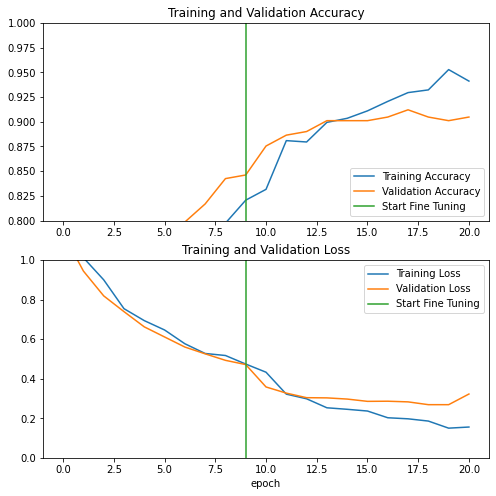

In [62]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Finalmente, com os resultados representados nos gráficos acima, pode-se perceber que com o ajute fino a acurácia do modelo aumentou e a perda diminuiu!! 

In [63]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 2s 630ms/step - loss: 0.0674 - accuracy: 0.9785
Test accuracy : 0.9784946441650391


Ao testar o nosso modelo com o dataset de teste, pôde-se comprovar a afirmação anterior, uma vez que o modelo conseguiu alcançar quase 98% de acurácia!!! Uma precisão muito maior do que a primeira tentativa feita com a regressão logística! 

Enfim, o código abaixo é o último desse notebook e com ele é possível observar visualmente como o modelo conseguiu classificar as imagens: 

Predictions:
 [0 2 1 0 1 2 1 0 2 1 0 2 1 2 0 1 1 0 1 1 0 1 1 0 0 1 1 2 2 0 2 0]
Labels:
 [0 2 1 0 1 2 1 0 2 1 0 2 1 2 0 1 1 0 1 1 0 1 1 0 0 1 1 2 2 0 2 0]


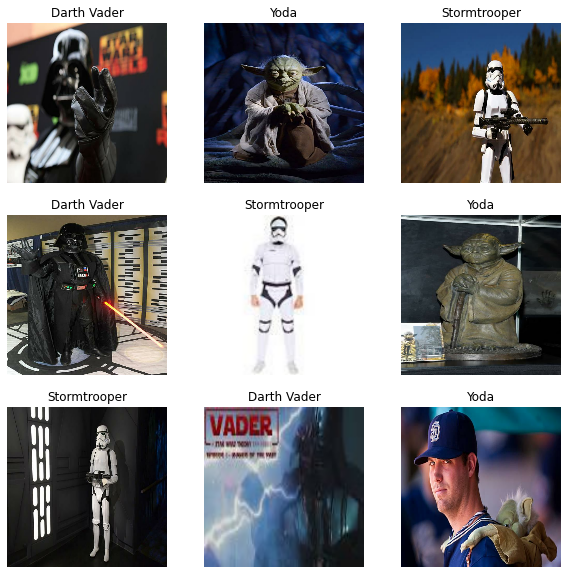

In [64]:
# Pegando algumas imagens do dataset de teste
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Tratamento da resposta do modelo (predição)
predict_array = []
for i in range(0, 32):
    predict_array.append(np.argmax(predictions[i]))
    result = ''.join(str(predict_array).split(','))

# Impressão dos 'labels'
print('Predictions:\n', result)
print('Labels:\n', label_batch)

# Plotagem
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predict_array[i]])
    plt.axis("off")

Com isso, foi possível perceber que ao reutilizar uma rede maior e previamente treinada, pode-se aproveitar dos pesos que já foram treinados e apenas adicionar algumas camadas/atualizar alguns pesos, de forma que o modelo final consiga obter uma acurácia bem maior do que um outro modelo criado do zero. 